# Pipeline

In [6]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#전처리
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import KBinsDiscretizer

# 매개변수 그리드
from sklearn.model_selection import GridSearchCV

#
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, pos_label="Y")

#파이프라인
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

# 성능 평가
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# model
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

In [7]:
pipe = Pipeline([("scaler", MinMaxScaler()), ("svm", SVC())])

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   random_state=0)

pipe.fit(X_train, y_train)
print("테스트 점수 : ", pipe.score(X_test,y_test))

테스트 점수 :  0.972027972027972


파이프라인에 스케일링 + 적용까지를 합쳐서 코드를 줄인다

In [9]:
param_grid = {'svm__C' : [0.001, 0.01, 0.1, 1, 10, 100],
             'svm__gamma' : [0.001, 0.01, 0.1, 1, 10, 100]}

grid  = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

# 파이프 + 그리드서치
# 딕셔너리 키를 단계랑 맞춰서 써야한다

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svm', SVC())]),
             param_grid={'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]})

In [11]:
print("테스트 세트 점수 : ", grid.score(X_test, y_test))
print("최적 매개변수 ", grid.best_params_)
print("최적 교차 검증 점수 ", grid.best_score_)
print("최적 성능 모델 ", grid.best_estimator_)

# 결과! default값이 최적임...

테스트 세트 점수 :  0.972027972027972
최적 매개변수  {'svm__C': 1, 'svm__gamma': 1}
최적 교차 검증 점수  0.9812311901504789
최적 성능 모델  Pipeline(steps=[('scaler', MinMaxScaler()), ('svm', SVC(C=1, gamma=1))])


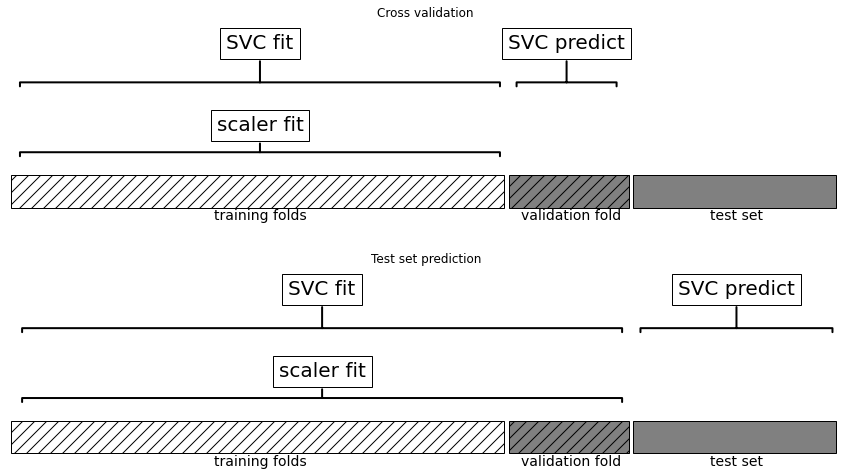

In [14]:
import mglearn
mglearn.plots.plot_proper_processing()

정보누설!

- 훈련/테스트로 분할하지 않고 모든 데이터를 교차 검증에 적용한다던가
- 훈련/검증을 함께 스케일링을 적용한다던가...

In [18]:
pipes = make_pipeline(MinMaxScaler(), SVC(C=100))

print("단계 : ", pipes.steps)

#알아서 바꿔준다!

단계 :  [('minmaxscaler', MinMaxScaler()), ('svc', SVC(C=100))]


In [21]:
from sklearn.decomposition import PCA

pipe_pca = make_pipeline(StandardScaler(), PCA(n_components=2), StandardScaler())

print("단계 : ", pipe_pca.steps)

# 같은 것을 여러번 쓰면 뒤에 번호를 붙여서 나온다

단계 :  [('standardscaler-1', StandardScaler()), ('pca', PCA(n_components=2)), ('standardscaler-2', StandardScaler())]


In [23]:
pipe_pca.fit(cancer.data)
components = pipe_pca.named_steps["pca"].components_

print("components.shape : ", components.shape)

components.shape :  (2, 30)


단계의 (여기에서는 pca) 속성에 접근하는법

// named_steps["이름"] 으로 접근 가능하다

In [25]:
param_grid = {
    'logisticregression__C' : [0.01, 0.1, 1, 10, 100]
}

pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1, 10, 100]})

In [26]:
print("테스트 세트 점수 : ", grid.score(X_test, y_test))
print("최적 매개변수 ", grid.best_params_)
print("최적 교차 검증 점수 ", grid.best_score_)
print("최적 성능 모델 ", grid.best_estimator_)


테스트 세트 점수 :  0.958041958041958
최적 매개변수  {'logisticregression__C': 1}
최적 교차 검증 점수  0.9812038303693571
최적 성능 모델  Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(C=1, max_iter=1000))])


In [28]:
print("로지스틱 회귀 단계 : ", grid.best_estimator_.named_steps["logisticregression"])

로지스틱 회귀 단계 :  LogisticRegression(C=1, max_iter=1000)


In [29]:
print("로지스틱 회귀 계수 : ", grid.best_estimator_.named_steps["logisticregression"].coef_)

로지스틱 회귀 계수 :  [[-0.29792942 -0.58056355 -0.3109406  -0.377129   -0.11984232  0.42855478
  -0.71131106 -0.85371164 -0.46688191  0.11762548 -1.38262136  0.0899184
  -0.94778563 -0.94686238  0.18575731  0.99305313  0.11090349 -0.3458275
   0.20290919  0.80470317 -0.91626377 -0.91726667 -0.8159834  -0.86539197
  -0.45539191  0.10347391 -0.83009341 -0.98445173 -0.5920036  -0.61086989]]


전처리 매개변수를 위한 그리드서치

In [31]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target,
                                                   random_state=0)


pipe = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(),
    Ridge()
)

param_grid = {'polynomialfeatures__degree' : [1,2,3],
             'ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]}

# 다항식 특성 생성 차수 설정과
# 릿지의 알파값 조정

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [34]:
print("테스트 세트 점수 : ", grid.score(X_test, y_test))
print("최적 매개변수 ", grid.best_params_)
print("최적 교차 검증 점수 ", grid.best_score_)
print("최적 성능 모델 ", grid.best_estimator_)

테스트 세트 점수 :  0.7683045464100136
최적 매개변수  {'polynomialfeatures__degree': 2, 'ridge__alpha': 10}
최적 교차 검증 점수  0.8287261407694715
최적 성능 모델  Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=10))])


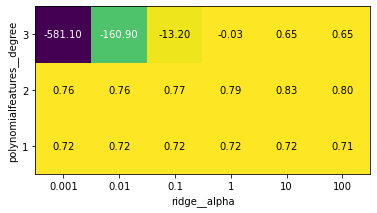

In [33]:
mglearn.tools.heatmap(grid.cv_results_['mean_test_score'].reshape(3,-1),
                     xlabel = 'ridge__alpha', ylabel='polynomialfeatures__degree',
                     xticklabels=param_grid['ridge__alpha'],
                      yticklabels = param_grid['polynomialfeatures__degree']
                     )

# 위의 결과를 히트맵으로 확인
# degree = 2일때 가장 효과가 좋고 3차항은 -값이 존재하는 정도로
# 매우 나쁜 결정계수를 가진다

In [35]:
pipe = make_pipeline(
    StandardScaler(),
    Ridge()
)

param_grid = {
             'ridge__alpha':[0.001, 0.01, 0.1, 1, 10, 100]}

# 릿지의 알파값 조정

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [36]:
print("테스트 세트 점수 : ", grid.score(X_test, y_test))
print("최적 매개변수 ", grid.best_params_)
print("최적 교차 검증 점수 ", grid.best_score_)
print("최적 성능 모델 ", grid.best_estimator_)

# 다항 특성 없을때의 결과
# 0.76 - 0.62로 점수 떨어짐....

테스트 세트 점수 :  0.6272671927504456
최적 매개변수  {'ridge__alpha': 10}
최적 교차 검증 점수  0.7233259452718361
최적 성능 모델  Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridge', Ridge(alpha=10))])


In [47]:
pipe = Pipeline([('preprocessing', StandardScaler()),
                ('classifier', SVC())])

param_grid = [
    {'classifier' : [SVC()], 'preprocessing': [StandardScaler()],
    'classifier__gamma' : [0.001, 0.01, 0.1, 1, 10, 100],
     'classifier__C' : [0.001, 0.01, 0.1, 1, 10, 100]
    }
    ,
    {
        'classifier' : [RandomForestClassifier()],
        'preprocessing' : [None], 'classifier__max_features' : [1,2,3]
    }
]

# SVC + randomforest 각각을 담은 
# 매개변수 그리드

# SVC는 standardscaler적용 + c와 gamma
# randomforest는 max_feautures로

In [48]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
                                                   cancer.target,
                                                   random_state=0)

grid = GridSearchCV(pipe, param_grid, cv=5).fit(X_train, y_train)

In [49]:
print("테스트 세트 점수 : ", grid.score(X_test, y_test))
print("최적 매개변수 ", grid.best_params_)
print("최적 교차 검증 점수 ", grid.best_score_)
print("최적 성능 모델 ", grid.best_estimator_)

테스트 세트 점수 :  0.9790209790209791
최적 매개변수  {'classifier': SVC(C=10, gamma=0.01), 'classifier__C': 10, 'classifier__gamma': 0.01, 'preprocessing': StandardScaler()}
최적 교차 검증 점수  0.9858823529411765
최적 성능 모델  Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier', SVC(C=10, gamma=0.01))])


랜덤포레스트보다 svc의 성능이 더 좋게 나온것을 확인할 수 있다.

In [65]:
df = pd.DataFrame(grid.cv_results_)

display(df.head())
display(df[36:])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__gamma,param_preprocessing,param_classifier__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009197,1.944406e-03,0.003800,0.000402,"SVC(C=10, gamma=0.01)",0.001,0.001,StandardScaler(),NaN,"{'classifier': SVC(C=10, gamma=0.01), 'classif...",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,19
1,0.006997,1.533311e-06,0.003400,0.000489,"SVC(C=10, gamma=0.01)",0.001,0.01,StandardScaler(),NaN,"{'classifier': SVC(C=10, gamma=0.01), 'classif...",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,19
2,0.006997,3.989506e-07,0.004000,0.000001,"SVC(C=10, gamma=0.01)",0.001,0.1,StandardScaler(),NaN,"{'classifier': SVC(C=10, gamma=0.01), 'classif...",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,19
3,0.006798,3.999710e-04,0.003801,0.000400,"SVC(C=10, gamma=0.01)",0.001,1,StandardScaler(),NaN,"{'classifier': SVC(C=10, gamma=0.01), 'classif...",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,19
4,0.009189,4.038978e-04,0.004608,0.000497,"SVC(C=10, gamma=0.01)",0.001,10,StandardScaler(),NaN,"{'classifier': SVC(C=10, gamma=0.01), 'classif...",0.627907,0.635294,0.623529,0.623529,0.623529,0.626758,0.004593,19


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__C,param_classifier__gamma,param_preprocessing,param_classifier__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
36,0.200007,0.039477,0.014392,0.002402,RandomForestClassifier(),NaN,NaN,None,1,"{'classifier': RandomForestClassifier(), 'clas...",0.918605,0.929412,0.929412,0.964706,0.988235,0.946074,0.026209,9
37,0.244656,0.097889,0.014799,0.001164,RandomForestClassifier(),NaN,NaN,None,2,"{'classifier': RandomForestClassifier(), 'clas...",0.953488,0.952941,0.917647,0.964706,0.988235,0.955404,0.022802,6
38,0.200273,0.013850,0.013407,0.002869,RandomForestClassifier(),NaN,NaN,None,3,"{'classifier': RandomForestClassifier(), 'clas...",0.953488,0.964706,0.929412,0.952941,0.976471,0.955404,0.015593,6
